## 중심극한정리에 대한 이해 
분포 검정, 테스트, 결국 모수 추정등을 하다가 그중 하나인 사실인(어디서들은) 데이터가 모일 수록 정규분포를 따른다는 이론이 실제인지 궁금함이 있어 정리함. <br>
굉장히 좋은블로그를 찾아냄. 비슷한 고민들이 많아서 나도 따라하기로함(다들 비슷한 고민을 하는것고 같음)<br>
보통 중심극한정리를 보면 샘플사이즈가 30이 넘어가면 정규분포를 보통 따른다고 봤다. <br>
하지만 이것은 샘플사이즈가 아니라 독립변수의 사이즈이다. <br>
평균과 분산이 같은 여러 개의 독립변수(X1…Xn)가 있을 때<br>
이 독립변수의 합으로 만든 새로운 독립변수를 Xsum이라고 하고,<br>
Xsum의 분포를 norm(0, 1)을 따르도록 표준화시켜주었을 때<br>
Xsum은 n이 커질수록 가우시안분포를 따른다는 것. <br>

reference <br>
https://datascienceschool.net/view-notebook/76acc92d28354e86940001f9fe85c50f/ <br>
https://frhyme.github.io/data-science/normality_test_qqplot/

### 정규분포임을 왜 확인할가?
- 체감상 가장 중요한것은 샘플링시에 해당 분포로 샘플링을 할 수 있다는것
- 실제 데이터는 skewness가 심할때도 많기 때문에 log처리(log normalize)하는 등을 해서 볼 때도 많다.
- 모델링시에 skew한 데이터는 노이즈를 줄 수 있다 skew함을 줄이는 방법으로 로그를 많이 취하는데 이것으로 노멀리티를 갖게 해주는것 같다.(이후 정규분포임을 확인이 필요하다)
- 분포모델을 안다면 모수 추정도 된다는 뜻?

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns

### 첫번째가 정규분포 그래프
- box플롯도, quantile도 중심(평균)0 기준으로 그려지고, 아래는 예쁘게 선형식으로 쭉 올라간다.(정규분포임을 알 수 있다)

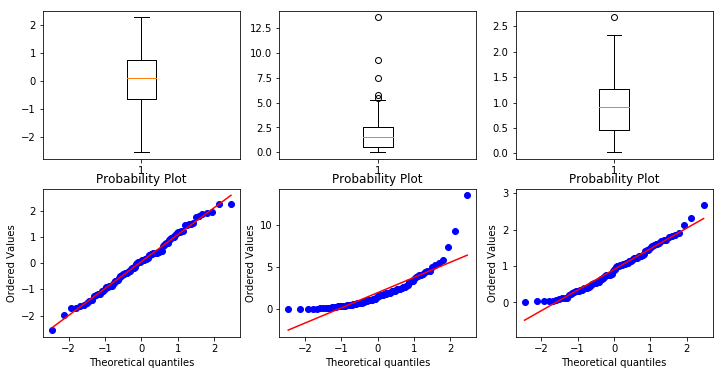

In [3]:
from scipy.stats import probplot
import matplotlib.pyplot as plt 
import numpy as np 

np.random.seed(0)

n = 100
x1 = np.random.normal(0, 1, n)
x2 = np.random.exponential(2, n)
x3 = np.log1p(x2)

f, axes = plt.subplots(2, 3, figsize=(12, 6))
axes[0][0].boxplot(x1)
probplot(x1, plot=axes[1][0]) 
axes[0][1].boxplot(x2)
probplot(x2, plot=axes[1][1]) 
axes[0][2].boxplot(x3)
probplot(x3, plot=axes[1][2]) 
plt.axis("equal")
#plt.savefig('../../assets/images/markdown_img/180619_1347_qqplot.svg')
plt.show()

### 위에서 말한데로 독립변수를 추가해서 정규분포를 따르는지 알아본다
- 방법은 데이터를 더 붙이고 히스토그램, qqplot 해본다
- 지수, 유니폼 분포의 변수를 여러개만들어 새로운 믹스쳐분포(변수)를 만든다(결국 이것이 정규분포를 따를것인가?
- 결론 : 된다. 위에서본 정규분포의 qqplot처럼 된다.(세번째꺼) 히스토그램도 그렇다

/Users/a1/anaconda2/envs/py3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


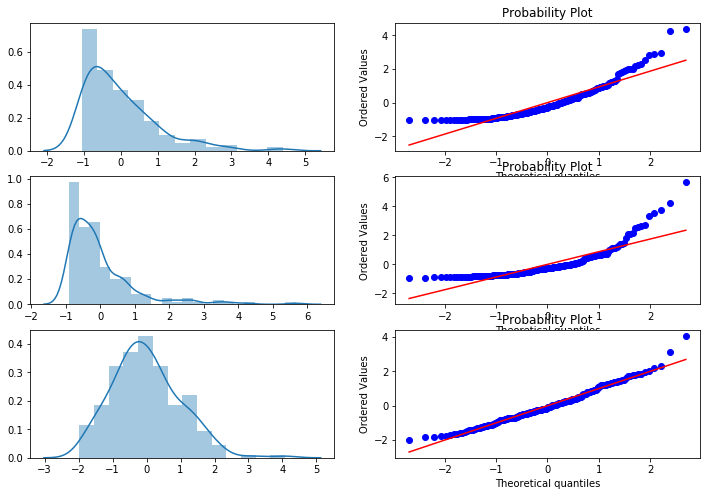

In [41]:
xss = np.array([
    np.array([np.random.exponential(2, n) for i in range(0, 1)]).sum(axis=0), 
    np.array([np.random.exponential(2, n) for i in range(0, 1)]).sum(axis=0),#             [np.random.uniform(2, 3, n)]).sum(axis=0), 
    np.array([np.random.exponential(1, n) for i in range(0, 20)]+
             [np.random.uniform(2, 4, n)]).sum(axis=0)
])
xss = np.apply_along_axis(lambda xs: (xs-xs.mean())/xs.std() , 1, xss) ## 노멀라이즈(0,1)
f, axes = plt.subplots(xss.shape[0], 2, figsize=(12, 8))
for i in range(0, xss.shape[0]):
    sns.distplot(xss[i], ax=axes[i][0])
    probplot(xss[i], plot=axes[i][1])
#plt.savefig('../../assets/images/markdown_img/180619_1342_central_limit_prove.svg')
plt.show()

### 모수가 다른 것들도 그럴가?
- 또 된다.


/Users/a1/anaconda2/envs/py3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


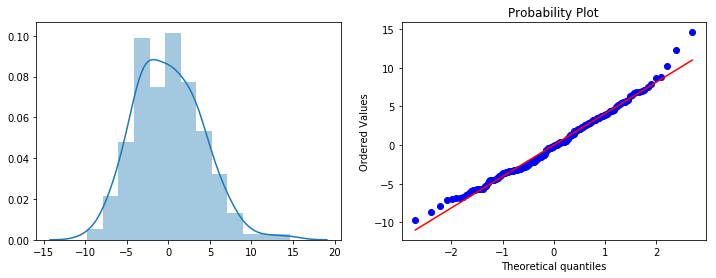

In [44]:
n = 200
xss = [
    np.random.exponential(np.random.randint(2, 100), n) for i in range(0, 20) ## 서로 다른 모수의 분포(셋)을 만들어 붙임
]
xss = list(map(lambda xs: (xs-xs.mean())/xs.std(), xss ))
xss = np.array(xss).sum(axis=0)
#xss = np.apply_along_axis(lambda xs: (xs-xs.mean())/xs.std() , 1, xss).sum(axis=0)

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.distplot(xss, ax=axes[0])
probplot(xss, plot=axes[1])
plt.show()

###  정규성검정 다른것은 없을가? 
- 왠지 저렇게 그래프로보면 알수 있을것 같지만, 뭔가 숫자(확률)로 딱 얼마나 정규분포냐를 보면 좋겠다
- scipy에서 분포검정 방법들을 메소드로 제공한다.
- p-value 값을 보고 가설검정식으로 이해하면 될듯하다.(0.05 이하 기각)